In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import os
import cv2 as cv

In [2]:
path=r"C:\Users\vidya\Downloads\Agricultural-crops\Agricultural-crops"

In [3]:
dis=os.listdir(path)
dis

['almond',
 'banana',
 'cardamom',
 'Cherry',
 'chilli',
 'clove',
 'coconut',
 'Coffee-plant',
 'cotton',
 'Cucumber',
 'Fox_nut(Makhana)',
 'gram',
 'jowar',
 'jute',
 'Lemon',
 'maize',
 'mustard-oil',
 'Olive-tree',
 'papaya',
 'Pearl_millet(bajra)',
 'pineapple',
 'rice',
 'soyabean',
 'sugarcane',
 'sunflower',
 'tea',
 'Tobacco-plant',
 'tomato',
 'vigna-radiati(Mung)',
 'wheat']

In [4]:
dis.index("sunflower")

24

In [5]:
dis.index("wheat")

29

In [6]:
Data=[]
for i in dis:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(150,150))
        T=dis.index(i)
        Data.append([C,T])

In [7]:
i=cv.imread(r"C:\Users\vidya\Downloads\Agricultural-crops\Agricultural-crops\Cherry\image24.jpeg")

In [8]:
i.shape

(225, 225, 3)

In [9]:
Data[0]

[array([[[ 94, 128, 118],
         [ 86, 117, 108],
         [ 76, 103,  94],
         ...,
         [ 67,  80,  68],
         [ 44,  55,  51],
         [ 46,  57,  55]],
 
        [[ 48,  82,  72],
         [ 27,  58,  49],
         [ 55,  82,  73],
         ...,
         [ 49,  62,  51],
         [ 35,  48,  42],
         [ 33,  46,  43]],
 
        [[ 37,  70,  60],
         [ 30,  59,  50],
         [ 82, 107,  99],
         ...,
         [ 36,  50,  38],
         [ 35,  50,  43],
         [ 34,  50,  46]],
 
        ...,
 
        [[ 62,  62,  67],
         [ 43,  45,  45],
         [ 56,  59,  60],
         ...,
         [ 59,  69,  63],
         [ 70,  83,  78],
         [ 62,  77,  72]],
 
        [[ 58,  57,  61],
         [ 61,  63,  64],
         [ 51,  53,  54],
         ...,
         [ 65,  75,  69],
         [ 54,  66,  60],
         [ 57,  71,  65]],
 
        [[ 49,  48,  52],
         [ 68,  67,  69],
         [ 42,  44,  44],
         ...,
         [ 60,  70,  64],
  

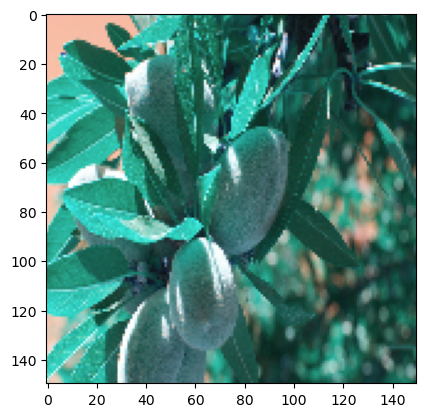

In [10]:
plt.imshow(Data[1][0])

In [11]:
len(Data)

829

In [12]:
len(Data[1][0])

150

In [13]:
Data[50][1]

1

In [14]:
import random
random.shuffle(Data)

In [15]:
F=[]
T=[]
for i,j in Data:
    F.append(i)
    T.append(j)

In [16]:
len(F)

829

In [17]:
T

[1,
 25,
 18,
 12,
 5,
 9,
 5,
 1,
 29,
 7,
 25,
 17,
 19,
 2,
 23,
 24,
 26,
 21,
 20,
 28,
 12,
 21,
 10,
 24,
 12,
 1,
 21,
 27,
 8,
 4,
 28,
 4,
 29,
 8,
 11,
 29,
 24,
 4,
 3,
 27,
 15,
 19,
 12,
 26,
 7,
 14,
 3,
 27,
 25,
 29,
 9,
 16,
 17,
 27,
 7,
 20,
 0,
 28,
 13,
 15,
 19,
 1,
 23,
 29,
 3,
 29,
 7,
 17,
 12,
 21,
 21,
 22,
 23,
 3,
 9,
 8,
 5,
 9,
 11,
 20,
 15,
 22,
 9,
 5,
 14,
 12,
 1,
 14,
 13,
 4,
 20,
 9,
 29,
 6,
 0,
 19,
 27,
 7,
 10,
 20,
 3,
 8,
 15,
 26,
 28,
 28,
 15,
 27,
 25,
 29,
 24,
 23,
 5,
 6,
 7,
 16,
 19,
 21,
 2,
 14,
 27,
 19,
 15,
 4,
 14,
 19,
 19,
 0,
 3,
 25,
 9,
 26,
 5,
 19,
 14,
 19,
 4,
 22,
 2,
 26,
 22,
 20,
 15,
 15,
 19,
 21,
 18,
 27,
 5,
 21,
 20,
 26,
 13,
 22,
 6,
 10,
 3,
 20,
 17,
 8,
 20,
 19,
 6,
 9,
 16,
 29,
 2,
 17,
 9,
 11,
 13,
 26,
 27,
 5,
 4,
 25,
 14,
 22,
 23,
 22,
 15,
 0,
 9,
 14,
 0,
 11,
 28,
 22,
 13,
 0,
 28,
 8,
 5,
 17,
 28,
 5,
 19,
 21,
 9,
 8,
 7,
 18,
 7,
 21,
 16,
 29,
 2,
 24,
 18,
 0,
 3,
 6,
 9,
 7,
 7,
 

In [18]:
T1=pd.get_dummies(T).replace({True:1,False:0})

C:\Users\vidya\AppData\Local\Temp\ipykernel_10528\3959669914.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0})


In [19]:
T1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
F=np.array(F)

In [21]:
T=np.array(T)

In [22]:
T

array([ 1, 25, 18, 12,  5,  9,  5,  1, 29,  7, 25, 17, 19,  2, 23, 24, 26,
       21, 20, 28, 12, 21, 10, 24, 12,  1, 21, 27,  8,  4, 28,  4, 29,  8,
       11, 29, 24,  4,  3, 27, 15, 19, 12, 26,  7, 14,  3, 27, 25, 29,  9,
       16, 17, 27,  7, 20,  0, 28, 13, 15, 19,  1, 23, 29,  3, 29,  7, 17,
       12, 21, 21, 22, 23,  3,  9,  8,  5,  9, 11, 20, 15, 22,  9,  5, 14,
       12,  1, 14, 13,  4, 20,  9, 29,  6,  0, 19, 27,  7, 10, 20,  3,  8,
       15, 26, 28, 28, 15, 27, 25, 29, 24, 23,  5,  6,  7, 16, 19, 21,  2,
       14, 27, 19, 15,  4, 14, 19, 19,  0,  3, 25,  9, 26,  5, 19, 14, 19,
        4, 22,  2, 26, 22, 20, 15, 15, 19, 21, 18, 27,  5, 21, 20, 26, 13,
       22,  6, 10,  3, 20, 17,  8, 20, 19,  6,  9, 16, 29,  2, 17,  9, 11,
       13, 26, 27,  5,  4, 25, 14, 22, 23, 22, 15,  0,  9, 14,  0, 11, 28,
       22, 13,  0, 28,  8,  5, 17, 28,  5, 19, 21,  9,  8,  7, 18,  7, 21,
       16, 29,  2, 24, 18,  0,  3,  6,  9,  7,  7,  6, 10,  1, 11, 23, 24,
       17,  1,  6, 20,  1

In [23]:
F1=F/255.

In [24]:
F

array([[[[  2,  57,  14],
         [  0,  71,  19],
         [ 35, 107,  60],
         ...,
         [188, 214, 238],
         [143, 169, 162],
         [146, 171, 180]],

        [[  1,  64,  18],
         [  1,  82,  34],
         [ 26,  50,  20],
         ...,
         [179, 205, 229],
         [170, 196, 194],
         [ 41,  72,  64]],

        [[  8,  75,  25],
         [ 13,  69,  28],
         [ 63,  59,  29],
         ...,
         [184, 208, 235],
         [164, 198, 174],
         [ 10,  47,  21]],

        ...,

        [[ 11,  22,  34],
         [  5,  19,  31],
         [  4,  17,  29],
         ...,
         [ 11, 136, 145],
         [ 27, 136, 148],
         [ 19, 153, 162]],

        [[ 11,  20,  33],
         [  3,  16,  28],
         [ 12,  21,  34],
         ...,
         [  5, 145, 146],
         [ 10, 105, 119],
         [ 10, 146, 154]],

        [[  6,  19,  31],
         [  3,  11,  24],
         [ 17,  26,  39],
         ...,
         [  0, 140, 144],
        

In [25]:
F1[1]

array([[[0.25490196, 0.92941176, 0.77647059],
        [0.2627451 , 0.85098039, 0.70980392],
        [0.28235294, 0.83921569, 0.70196078],
        ...,
        [0.3254902 , 0.77254902, 0.65098039],
        [0.28627451, 0.76078431, 0.62745098],
        [0.31372549, 0.8       , 0.65882353]],

       [[0.2       , 0.85882353, 0.70588235],
        [0.26666667, 0.84313725, 0.70196078],
        [0.29803922, 0.85098039, 0.71372549],
        ...,
        [0.31372549, 0.76470588, 0.64313725],
        [0.30588235, 0.78039216, 0.64705882],
        [0.28235294, 0.76862745, 0.62745098]],

       [[0.12156863, 0.74509804, 0.60784314],
        [0.21960784, 0.77647059, 0.64313725],
        [0.25882353, 0.8       , 0.67058824],
        ...,
        [0.3254902 , 0.78431373, 0.6627451 ],
        [0.29803922, 0.78039216, 0.64705882],
        [0.25882353, 0.74509804, 0.60784314]],

       ...,

       [[0.10196078, 0.68627451, 0.57647059],
        [0.09803922, 0.63921569, 0.4745098 ],
        [0.12156863, 0

In [26]:
F1.shape

(829, 150, 150, 3)

In [27]:
T1.shape

(829, 30)

In [28]:
T1=np.array(T)

In [29]:
model=Sequential()
#DATA AUGMENTATION
#model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
#model.add(layers.experimental.preprocessing.RandomRotation(0.1))
#model.add(layers.experimental.preprocessing.RandomZoom(0.1))
#model.add(layers.experimental.preprocessing.RandomContrast(0.1))




model.add(  Conv2D( 50,   (5,5),  activation='relu')  )
model.add(  MaxPooling2D(  (2,2)  ,strides=(1,1)))

model.add(Conv2D(50,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))


model.add(Flatten())

model.add(Dense(50,input_shape=(150,150,),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],)

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.fit(F1,T1, epochs=1, validation_split=0.10, batch_size=20)

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.0507 - loss: 0.0000e+00 - val_accuracy: 0.0120 - val_loss: 0.0000e+00


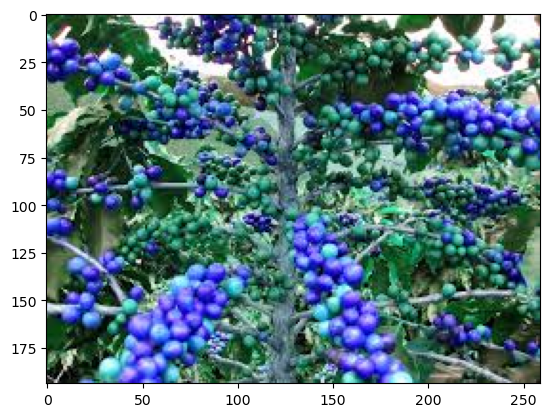

In [32]:
img_path = r"C:\Users\vidya\Downloads\Agricultural-crops\Agricultural-crops\Coffee-plant\images74.jpg"
img = cv.imread(img_path,)

img_resized = cv.resize(img, (150, 150))
img_resized=img_resized.reshape(1, 150, 150, 3)

plt.imshow(img,)
plt.show()

In [33]:
prediction = model.predict(img_resized)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


array([[1.]], dtype=float32)

In [34]:
dis[1]

'banana'

In [36]:
p1=r"C:\Users\vidya\Downloads\Agricultural-crops\Agricultural-crops"


In [37]:
Data1=[]
for i in dis:
    A=os.path.join(p1,i) 
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(150,150))
        T=dis.index(i) 
        Data1.append([C,T]) 

In [38]:
import random
random.shuffle(Data1)

In [39]:
Data1[1]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 30,  78,  55],
         [ 47, 112,  82],
         [ 35,  90,  65]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 17,  60,  39],
         [ 19,  64,  41],
         [ 37,  92,  67]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [ 21,  62,  37],
         [ 49,  93,  71],
         [ 39,  77,  56]],
 
        ...,
 
        [[111, 178, 139],
         [ 91, 163, 117],
         [ 66, 128,  80],
         ...,
         [ 44,  75,  92],
         [ 58,  96, 110],
         [ 58,  89, 108]],
 
        [[ 95, 162, 117],
         [ 87, 155, 104],
         [ 96, 167, 123],
         ...,
         [ 49,  84,  97],
         [101, 131, 149],
         [129, 154, 171]],
 
        [[119, 185, 144],
         [101, 168, 122],
         [118, 181, 141],
         ...,
         [ 88, 128, 146],
  

In [40]:
F1=[]
T1=[]
for i,j in Data1:
    F1.append(i)
    T1.append(j)

In [41]:
T1

[29,
 8,
 17,
 13,
 24,
 29,
 15,
 22,
 26,
 6,
 19,
 16,
 8,
 24,
 6,
 5,
 6,
 14,
 1,
 1,
 18,
 19,
 10,
 24,
 19,
 8,
 24,
 18,
 11,
 1,
 9,
 14,
 11,
 4,
 25,
 7,
 3,
 13,
 14,
 15,
 3,
 19,
 15,
 26,
 12,
 13,
 2,
 0,
 21,
 14,
 7,
 29,
 2,
 10,
 28,
 26,
 0,
 1,
 14,
 10,
 25,
 27,
 25,
 25,
 0,
 9,
 11,
 11,
 19,
 6,
 3,
 23,
 25,
 26,
 17,
 20,
 25,
 4,
 17,
 7,
 27,
 22,
 20,
 6,
 26,
 13,
 18,
 29,
 4,
 17,
 5,
 6,
 10,
 17,
 17,
 29,
 22,
 20,
 29,
 14,
 19,
 11,
 17,
 5,
 22,
 13,
 19,
 11,
 9,
 19,
 7,
 12,
 8,
 22,
 21,
 17,
 9,
 25,
 11,
 11,
 24,
 25,
 13,
 0,
 17,
 28,
 3,
 14,
 2,
 10,
 12,
 0,
 13,
 11,
 5,
 9,
 26,
 10,
 1,
 28,
 17,
 27,
 29,
 13,
 20,
 15,
 26,
 26,
 5,
 16,
 23,
 7,
 10,
 17,
 10,
 2,
 26,
 1,
 20,
 18,
 28,
 26,
 24,
 8,
 14,
 23,
 4,
 14,
 22,
 26,
 13,
 15,
 9,
 21,
 13,
 25,
 27,
 20,
 6,
 13,
 29,
 6,
 18,
 20,
 11,
 27,
 26,
 15,
 4,
 19,
 3,
 21,
 27,
 9,
 27,
 22,
 14,
 3,
 12,
 25,
 22,
 19,
 11,
 28,
 8,
 3,
 21,
 15,
 23,
 1,
 9,
 14,


In [42]:
F1=np.array(F1)
F1=F1/255  

In [43]:
pred=model.predict(F1)
pred

C:\Users\vidya\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 973ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [44]:
pred1=[]
for i in pred:
    pred1.append(np.argmax(i))

In [45]:
pred1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [47]:
confusion_matrix(T1,pred1)

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [29,  0,  0,  0,  0,  0,  0,  0,  

In [48]:
print(classification_report(T1,pred1))

              precision    recall  f1-score   support

           0       0.03      1.00      0.05        21
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00        31
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        31
          16       0.00      0.00      0.00        28
          17       0.00    

C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vidya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
accuracy_score(T1,pred1)*100

2.5331724969843186